In [1]:
from src import *
from tqdm.notebook import tqdm

In [2]:
CCSN = read_SNe("CCSNe.txt")
centroids, positions, den_r, tree = read_dark_matter("mcmc_10000.h5")

In [3]:
posterior = read_bilby('-108 -100 -132')

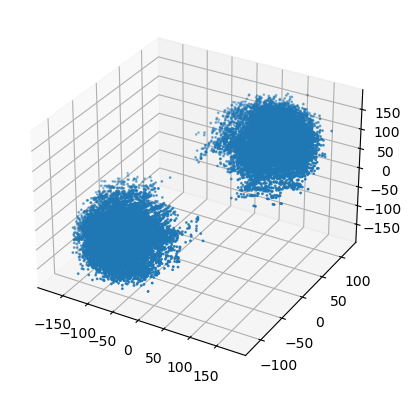

In [9]:
fig, ax =plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(posterior['x'], posterior['y'], posterior['z'], s=1)

# Cut function

In [ ]:
SN = QTable.read('SN_density.ecsv')

In [ ]:
plt.figure(figsize=(8, 6))

c_den, b_den, _ = plt.hist(
    den_r,
    histtype="step",
    bins=100,
    log=True,
    density=True,
    color="b",
    label="Dark Matter density",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r, k=4)
plt.hist(
    den_SN,
    histtype="step",
    bins=b_den,
    log=True,
    density=True,
    color="yellow",
    label="Dark Matter density near SNe",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, den_r, k=4
)
c, b, _ = plt.hist(
    den_CCSN,
    histtype="stepfilled",
    bins=b_den,
    log=True,
    density=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)


plt.axvline(
    np.mean(den_r),
    linestyle=":",
    color="b",
    label="Mean Dark Matter density : {:.1e}".format(np.mean(den_r)),
)
plt.axvline(
    np.mean(den_CCSN),
    linestyle=":",
    color="r",
    label="Mean Dark Matter density near CCSN : {:.1e}".format(np.mean(den_CCSN)),
)
plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"Overdensity $\delta = \frac{\rho}{\overline{\rho}} -1$")
plt.title("Histogram used for the sigmoid method")

In [ ]:
import numpy as np
from src import reweight, complete_path, BORGPriorDist, BORGPrior, read_bilby, read_dark_matter, read_SNe, density_BORG
from scipy.interpolate import interp1d
from scipy.signal import filtfilt

_, _, den_r, tree = read_dark_matter('mcmc_10000.h5')
c_dm, bins = np.histogram(den_r, bins=np.linspace(-1, 110, 10000), density=True)

SN = read_SNe('all_SNe.txt')
c_sn, _ = np.histogram(density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r, k=4), bins=bins, density=True)

cs_dm = np.cumsum(c_dm)
cs_dm /= cs_dm[-1]
cs_sn = np.cumsum(c_sn)
cs_sn /= cs_sn[-1]
xx = (bins[:-1] + bins[1:]) / 2 

n = 10
smooth =  filtfilt([1]*n, n, cs_sn/cs_dm)
filter_ = interp1d(xx, smooth, kind='cubic', bounds_error=False, fill_value=0)


In [ ]:
plt.figure(figsize=(8, 6))

cs_dm, bins,_ = plt.hist(
    den_r,
    histtype="step",
    bins=np.linspace(-1, 110, 10000),
    density=True,
    cumulative=True,
    color="b",
    label="Dark Matter density",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r, k=4)
cs_SN,_,_ = plt.hist(
    den_SN,
    histtype="step",
    bins=bins,
    density=True,
    cumulative=True,
    color="yellow",
    label="Dark Matter density near SNe",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, den_r, k=4
)
cs_CCSN,_,_ = plt.hist(
    den_CCSN,
    histtype="stepfilled",
    bins=bins,
    density=True,
    cumulative=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)


# plt.axvline(np.mean(den_r), linestyle=':', color='b', label = 'Mean Dark Matter density : {:.1e}'.format(np.mean(den_r)))
# plt.axvline(np.mean(den_CCSN), linestyle=':', color='r', label = 'Mean Dark Matter density near CCSN : {:.1e}'.format(np.mean(den_CCSN)))
plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"Overdensity $\delta = \frac{\rho}{\overline{\rho}} -1$")
plt.title('Cumulative histogram for the new method')

In [ ]:
xx = (bins[:-1] + bins[1:]) / 2 
t = 20
cs_dm = cs_dm[xx < t]
cs_SN = cs_SN[xx < t]
cs_CCSN = cs_CCSN[xx < t]
xx = xx[xx < t]
xx

In [ ]:

plt.plot(xx, (cs_dm), label='DM')
plt.plot(xx, (cs_SN), label='SN')
plt.plot(xx, (cs_CCSN), label='CCSN')

r = cs_SN/cs_dm
plt.plot(xx, r, label='ratio SN/DM')
plt.axhline(1, color='k', linestyle='--', alpha=0.2)
from scipy.signal import filtfilt

n = 10
smooth_r =  filtfilt([1]*n, n, cs_SN/cs_dm)
plt.plot(xx, smooth_r, label='smoothed ratio', color='k', linestyle=':')

plt.scatter([-0.85, -0.56, 1.03, 8.3], np.cumsum([0.04, 0.44, 0.47, 0.05]), marker='*', color="k", label = "Eleni's points")

plt.xlim(-1.5, 9.)
plt.legend()
plt.title('Zoom on the low density region')


In [ ]:
plt.plot(xx, cs_dm/cs_SN)
plt.xlim(-1.1,1)

In [ ]:
plt.plot(xx, np.abs(cs_SN-cs_dm))
xx[np.where(np.abs(cs_SN - cs_dm).max()==np.abs(cs_SN - cs_dm))]

In [ ]:
plt.scatter(cs_SN/cs_dm, cs_dm - cs_SN)

In [ ]:
cs_dm[xx < -0.85].max(), cs_SN[xx < -0.85].max()

In [ ]:
plt.plot(xx, (cs_SN)-(cs_dm))
plt.plot(xx, (cs_SN)-(cs_CCSN))

In [ ]:
from scipy.interpolate import interp1d
n = 2
light_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_light_smooth = interp1d(xx, light_smooth, kind='cubic', bounds_error=False, fill_value=0)

n = 10
medium_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_medium_smooth = interp1d(xx, medium_smooth, kind='cubic', bounds_error=False, fill_value=0)

n = 20
high_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_high_smooth = interp1d(xx, high_smooth, kind='cubic', bounds_error=False, fill_value=0)


In [ ]:
plt.plot(xx, cs_SN/cs_dm, label='Original ratio')
plt.plot(xx, light_smooth, alpha=0.4, linestyle='--', label='light smoothing')
plt.plot(xx, medium_smooth, alpha=0.4, linestyle=':', label='medium smoothing')
plt.plot(xx, high_smooth, alpha=0.4, linestyle='-.', label='high smoothing')
plt.ylabel("Ratio")
plt.xlabel("Overdensity $\delta$")
plt.title("Smoothing")
plt.xlim(-1.1, 0.)

In [ ]:
_=plt.hist(sigmoid(den_r)/np.max(sigmoid(den_r)), density=True, bins=100, alpha=0.4, label='Sigmoid weights')

_=plt.hist(test_light_smooth(den_r)/np.max(test_light_smooth(den_r)), density=True, bins=100, histtype='step', label='New weights light smoothing')
_=plt.hist(test_medium_smooth(den_r)/np.max(test_medium_smooth(den_r)), density=True, bins=100, histtype='step', label='New weights medium smoothing')
_=plt.hist(test_high_smooth(den_r)/np.max(test_high_smooth(den_r)), density=True, bins=100, histtype='step', label='New weights high smoothing')
plt.legend()
plt.xlabel("Relative weight")
plt.title('Weights distribution for both method')

In [ ]:
posterior = read_bilby("SN2018avy")

In [ ]:
posterior['density'] = density_BORG(
    np.vstack([posterior["x"], posterior["y"], posterior["z"]]).T, tree, den_r, k=4
)

In [ ]:
_=plt.hist(test_medium_smooth(posterior['density']), density=True, bins=100, label='Sigmoid weights')
_=plt.hist(sigmoid(posterior['density']), density=True, bins=100, histtype='step', label='new weights')


In [ ]:
from src.const import boxsize

import numpy as np
from numpy.typing import NDArray, ArrayLike
from bilby.core.prior import BaseJointPriorDist, JointPrior, JointPriorDistError

from astropy.coordinates import SkyCoord
from astropy.units import Unit, rad
from astropy.cosmology import Cosmology, LambdaCDM
from scipy.interpolate import interp1d


class TESTPriorDist(BaseJointPriorDist):
    """
    Class defining prior according to given BORG grid

    Parameters
    ==========

    borg_file : file path to .fits file
        .fits file that contains the 2D or 3D Healpix Map
    bounds : dict or list (optional)
        dictionary or list with given prior bounds. defaults to normal bounds on ra, dev and 0, inf for distance
        if this is for a 3D map

    Returns
    =======

    PriorDist : `bilby.gw.prior.HealPixMapPriorDist`
        A JointPriorDist object to store the joint prior distribution according to passed healpix map
    """

    def __init__(
        self,
        borg_file: str,
        bounds: ArrayLike | None = None,
        cosmo: Cosmology | None = None,
        filter: object | None = None,
    ) -> None:
        
        self.borg_file = borg_file
        self.filter = filter

        names = ["ra", "dec", "luminosity_distance"]
        
        if cosmo is None:
            H0, Om0 = 67.66, 0.3111
            Ode0 = 1.0 - Om0
            self.cosmo = LambdaCDM(H0, Om0, Ode0)

        self.comov_to_ld = interp1d(
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )
        self.ld_to_comov = interp1d(
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )

        from src.load import read_dark_matter

        _, self.positions, self.density, self.tree = read_dark_matter(borg_file)

        if filter:
            self.prob = filter(self.density)
        else:
            self.prob = self._sigmoid(self.density)

        self.prob[
            (np.linalg.norm(self.positions, ord=2, axis=1) > boxsize / 2)
            | (np.linalg.norm(self.positions, ord=2, axis=1) < 50)
        ] = 0
        self.prob = self._check_norm(self.prob)

        self.npix = len(self.prob)
        self.N = np.cbrt(self.npix)
        self.pixel_length = boxsize / self.N
        self.pixel_volume = self.pixel_length**3

        if bounds is None:
            bounds = [
                [0, 2 * np.pi],
                [-np.pi / 2.0, np.pi / 2.0],
                [
                    float(self.comov_to_ld((50 - np.sqrt(3) * self.pixel_length) / 2)),
                    float(
                        self.comov_to_ld((boxsize + np.sqrt(3) * self.pixel_length) / 2)
                    ),
                ],
            ]

        elif isinstance(bounds, dict):
            bs = [[] for _ in bounds.keys()]
            for i, key in enumerate(bounds.keys()):
                bs[i] = (bounds[key][0], bounds[key][1])
            bounds = bs

        super(TESTPriorDist, self).__init__(names=names, bounds=bounds)
        self.distname = "BORG"
        self.pix_xx = np.arange(self.npix)
        self._all_interped = interp1d(
            x=self.pix_xx, y=self.prob, bounds_error=False, fill_value=0
        )
        self.inverse_cdf = None

        self._build_attributes()

    def _build_attributes(self) -> None:
        """
        Method that builds the inverse cdf of the P(pixel) distribution for rescaling
        """
        from scipy.integrate import cumtrapz

        yy = self._all_interped(self.pix_xx)
        yy /= np.trapz(yy, self.pix_xx)
        YY = cumtrapz(yy, self.pix_xx, initial=0)
        YY[-1] = 1
        self.inverse_cdf = interp1d(x=YY, y=self.pix_xx, bounds_error=True)

    def _rescale(self, samp: float | int) -> NDArray:
        """
        Overwrites the _rescale method of BaseJoint Prior to rescale a single value from the unitcube onto
        three values (ra, dec, ld)

        Parameters
        ==========
        samp : float, int
            must take in single value for pixel on unitcube to rescale onto ra, dec, distance for the map Prior

        Returns
        =======
        rescaled_sample : array_like
            sample to rescale onto the prior
        """
        samp = samp[:, 0]
        pix_rescale = self.inverse_cdf(samp)
        sample = np.empty((len(pix_rescale), 3))

        for i, val in enumerate(pix_rescale):
            sample[i, :] = self.draw_from_pixel(int(round(val)))[::-1]

        return sample.reshape((-1, self.num_vars))

    @staticmethod
    def _sigmoid(x: object, alpha: float = 4.5, center: float = -0.3) -> object:
        """
        static method to

        Parameters
        ==========
        array : float or array_like
            input

        Returns
        =======
        values : float array_like
            returns value of sigmoid at the input points
        """
        return 1 / (1 + np.exp(-alpha * (x - center)))

    @staticmethod
    def _check_norm(array: object) -> object:
        """
        static method to check if array is properlly normalized and if not to normalize it.

        Parameters
        ==========
        array : array_like
            input array we want to renormalize if not already normalized

        Returns
        =======
        normed_array : array_like
            returns input array normalized
        """
        norm = np.linalg.norm(array, ord=1)
        if norm == 0:
            norm = np.finfo(array.dtype).eps
        return array / norm

    def _sample(self, size: int) -> NDArray:
        """
        Overwrites the _sample method of BaseJoint Prior. Picks a pixel value according to their probabilities, then
        uniformly samples ra, and decs that are contained in chosen pixel. If the PriorDist includes distance it then
        updates the distance distributions and will sample according to the conditional distance distribution along a
        given line of sight

        Parameters
        ==========
        size : int
            number of samples we want to draw

        Returns
        =======
        sample : array_like
            sample of ra, and dec (and distance if 3D=True)
        """
        pixel_choices = np.arange(self.npix)
        sample_pix = np.random.choice(
            pixel_choices, size=size, p=self.prob, replace=True
        )
        sample = np.empty((size, self.num_vars))
        for samp in range(size):
            sample[samp, :] = self.draw_from_pixel(sample_pix[samp])
        return sample.reshape((-1, self.num_vars))

    def draw_from_pixel(self, pix: int) -> NDArray:
        """
        Recursive function to uniformly draw ra, and dec values that are located in the given pixel

        Parameters
        ==========
        pix : int
            pixel index for given pixel we want to get ra, and dec from

        Returns
        =======
        ra_dec_ld : ndarray
            this returns an array of ra, dec and ld sampled uniformly that are in the pixel given
        """
        x, y, z = self.positions[pix]
        draw_x = np.random.uniform(x - self.pixel_length / 2, x + self.pixel_length / 2)
        draw_y = np.random.uniform(y - self.pixel_length / 2, y + self.pixel_length / 2)
        draw_z = np.random.uniform(z - self.pixel_length / 2, z + self.pixel_length / 2)

        r = np.linalg.norm([draw_x, draw_y, draw_z], ord=2)

        draw_ra = np.arctan2(draw_y, draw_x)
        draw_dec = np.arcsin(draw_z / r)

        draw_ld = self.comov_to_ld(r)

        return np.array([draw_ra, draw_dec, draw_ld])

    def _ln_prob(
        self, samp: ArrayLike, lnprob: ArrayLike, outbounds: ArrayLike
    ) -> ArrayLike:
        """
        Overwrites the _lnprob method of BaseJoint Prior

        Parameters
        ==========
        samp : array_like
            samples of ra, dec, ld to evaluate the lnprob at
        lnprob : array_like
            array of correct length we want to populate with lnprob values
        outbounds : boolean array
            boolean array that flags samples that are out of the given bounds

        Returns
        =======
        lnprob : array_like
            lnprob values at each sample
        """
        for i in range(samp.shape[0]):
            if not outbounds[i]:
                ra, dec, ld = samp[i]
                coord = SkyCoord(
                    ra=ra * rad, dec=dec * rad, distance=self.ld_to_comov(ld)
                )
                _, pixel = self.tree.query(
                    [
                        coord.icrs.cartesian.x + boxsize / 2,
                        coord.icrs.cartesian.y + boxsize / 2,
                        coord.icrs.cartesian.z + boxsize / 2,
                    ],
                    k=1,
                )
                lnprob[i] = np.log(self.prob[pixel] / self.pixel_volume)
        lnprob[outbounds] = -np.inf
        return lnprob

    def __eq__(self, other) -> bool:
        skip_keys = ["_all_interped", "inverse_cdf"]
        if self.__class__ != other.__class__:
            return False
        if sorted(self.__dict__.keys()) != sorted(other.__dict__.keys()):
            return False
        for key in self.__dict__:
            if key in skip_keys:
                continue
            if key == "borg_file":
                if self.__dict__[key] != other.__dict__[key]:
                    return False
            elif isinstance(self.__dict__[key], (np.ndarray, list)):
                thisarr = np.asarray(self.__dict__[key])
                otherarr = np.asarray(other.__dict__[key])
                if thisarr.dtype == float and otherarr.dtype == float:
                    fin1 = np.isfinite(np.asarray(self.__dict__[key]))
                    fin2 = np.isfinite(np.asarray(other.__dict__[key]))
                    if not np.array_equal(fin1, fin2):
                        return False
                    if not np.allclose(thisarr[fin1], otherarr[fin2], atol=1e-15):
                        return False
                else:
                    if not np.array_equal(thisarr, otherarr):
                        return False
            else:
                if not self.__dict__[key] == other.__dict__[key]:
                    return False
        return True


class TESTPrior(JointPrior):
    """
    A prior distribution that follows a user-provided HealPix map for one
    parameter.

    See :code:`bilby.gw.prior.HealPixMapPriorDist` for more details of how to
    instantiate the prior.
    """

    def __init__(
        self,
        dist: TESTPriorDist,
        name: str = None,
        latex_label: str = None,
        unit: Unit = None,
    ) -> None:
        """

        Parameters
        ----------
        dist: bilby.gw.prior.HealPixMapPriorDist
            The base joint probability.
        name: str
            The name of the parameter, it should be contained in the map.
            One of ["ra", "dec", "luminosity_distance"].
        latex_label: str
            Latex label used for plotting, will be read from default values if
            not provided.
        unit: str
            The unit of the parameter.
        """
        if not isinstance(dist, TESTPriorDist):
            raise JointPriorDistError("dist object must be instance of BORGPriorDist")
        super(TESTPrior, self).__init__(
            dist=dist, name=name, latex_label=latex_label, unit=unit
        )


In [ ]:
test_prior = TESTPriorDist('mcmc_10000.h5', filter = test_medium_smooth)

In [ ]:
test_prior.sample(20000)

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
axs[0].hist(test_prior.current_sample["ra"], bins=50, density=True)
axs[0].set_title('RA')
axs[1].hist(test_prior.current_sample["dec"], bins=50, density=True)
axs[1].set_title('DEC')
axs[2].hist(test_prior.current_sample["luminosity_distance"], bins=50, density=True)
axs[2].set_title(r'$l_d$')

In [ ]:
res = bilby.result.read_in_result('outdir/SN2018avy/SN2018avy_result.json')

In [ ]:
new_prior = res.priors.copy()

In [ ]:
new_prior['ra'] = TESTPrior(test_prior, 'ra')
new_prior['dec'] = TESTPrior(test_prior, 'dec')
new_prior['luminosity_distance'] = TESTPrior(test_prior, 'luminosity_distance')

In [ ]:
rew_res = reweight(res, new_prior=new_prior, npool=8)

In [ ]:
rew_res.outdir = "/mnt/c/Users/antoi/Documents/Scolaire/NPAC/Stage/SN-and-DM-repartition/outdir/SN2018avy"

In [ ]:
rew_res.save_to_file(extension='pkl')

In [ ]:
new_reweight = read_bilby('SN2018avy_reweighted', dir="SN2018avy")

In [ ]:
plot_posterior(posterior)

In [ ]:
plot_posterior(new_reweight)

In [ ]:
contourf_mollweide(posterior)
contourf_mollweide(new_reweight)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

N_bins=256
bins = (np.linspace(-boxsize / 2, boxsize / 2, N_bins) * Mpc,) * 3

meshes = successive_shells(posterior, quantiles = (0.5,0.9), bins=bins, sigma=4.0)

for mesh, sty in zip(
    meshes, cycler("color", plt.cm.autumn(np.linspace(0, 1, len(meshes))))
):
    plot_trimesh(mesh, ax=ax, alpha=0.05, **sty)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

N_bins=256
bins = (np.linspace(-boxsize / 2, boxsize / 2, N_bins) * Mpc,) * 3

meshes = successive_shells(new_reweight, quantiles = (0.5,0.9), bins=bins, sigma=4.0)

for mesh, sty in zip(
    meshes, cycler("color", plt.cm.autumn(np.linspace(0, 1, len(meshes))))
):
    plot_trimesh(mesh, ax=ax, alpha=0.05, **sty)

# With DM GRID

In [ ]:
from src import *
import bilby
import numpy as np
import healpy as hp

centroids, positions, den_r, tree = read_dark_matter("mcmc_10000.h5")

In [ ]:
def sigmoid(x, alpha=4.5, center=-0.3):
    return 1 / (1 + np.exp(-alpha * (x - center)))


# xx = np.linspace(-1, 2,1000)
# plt.plot(xx, sigmoid(xx))

In [ ]:
_, shell_pos, shell_den = extract_shell(
    centroids=centroids, positions=positions, den_r=den_r, tree=tree, radius=100, dr=100
)

In [ ]:
ipix = healpy.vec2pix(nside, shell_pos[:, 0], shell_pos[:, 1], shell_pos[:, 2])

map_values = np.zeros(healpy.nside2npix(nside), dtype=float)

for i in range(len(ipix)):
    if sigmoid(shell_den[i]) > np.random.random():
        map_values[ipix[i]] = 1

map_values = healpy.sphtfunc.smoothing(map_values, fwhm=0.03)

In [ ]:
healpy.projview(
    map_values,
    cmap="gist_yarg",
    graticule=True,
    graticule_labels=True,
    projection_type="mollweide",
)

In [ ]:
plot_all_mollweide(shell_pos, shell_den)

In [ ]:
map, _ = generate_map(
    shell_pos.T, sigmoid(shell_den), representation_type="cartesian", fwhm=0.3
)
dec = -0.96
ra = 1.64

hp.projview(map, projection_type="mollweide")
plt.gca().scatter(-ra, dec, marker="*", color="r")
plt.figure()
hp.projview(map, projection_type="cart")

In [ ]:
hp.write_map("test.fits", map, overwrite=True)

In [ ]:
priordist = HealPixMapPriorDist("test.fits")
priordist.sample(50000)
sample = dict(ra=priordist.current_sample["ra"], dec=priordist.current_sample["dec"])

In [ ]:
HealPixPrior(priordist, "ra"), HealPixPrior(priordist, "dec")

In [ ]:
map, _ = generate_map(np.array([sample["ra"], sample["dec"]]), fwhm=0.2)
hp.projview(map, projection_type="mollweide")
plt.figure()
hp.projview(map, projection_type="cart")

In [ ]:
_ = plt.hist(sample["ra"], bins=40)
plt.figure()
_ = plt.hist(sample["dec"], bins=40)

In [ ]:
%matplotlib
x,y,z = np.cos(sample['dec'])*np.cos(sample['ra']), np.cos(sample['dec'])*np.sin(sample['ra']), np.sin(sample['dec'])
plt.figure(figsize=(15,15))
plt.subplot(projection="3d")
den_points = density_BORG(np.vstack([100*x,100*y,100*z]).T, tree, den_r, k=10)
cm = plt.gca().scatter(x, y, z, marker='.', c = den_points, s=5, cmap='viridis')
plt.colorbar(cm)

plt.show()

In [ ]:
%matplotlib inline
import matplotlib
nside=8
map,_ = generate_map(shell_pos.T, sigmoid(shell_den), representation_type='cartesian', nside=nside, fwhm=0.3)

In [ ]:
from trimesh import Trimesh

nside=64
map,_ = generate_map(shell_pos.T, sigmoid(shell_den), representation_type='cartesian', nside=nside, fwhm=0.03)
fcolors = matplotlib.colormaps['viridis'](map/np.max(map))[:, :-1]

npix=hp.nside2npix(nside)
step=1

trim_ = Trimesh(vertices = np.vstack([hp.boundaries(nside, i, step).T for i in range(npix)]),
                faces=[np.arange(i*4*step, (i+1)*4*step, 1) for i in range(npix)],
                face_colors=fcolors)
%matplotlib
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

mesh = Poly3DCollection(trim_.vertices[trim_.faces], facecolors=fcolors, alpha=1, edgecolor=None)
plt.close()
plt.figure(figsize=(20,20))
mesh.set_array(None)
mesh.set_facecolors(np.vstack([fcolors]*2))
ax = plt.subplot(projection="3d")
ax.add_collection3d(mesh)

ax.set_xlim(trim_.vertices[:,0].min(), trim_.vertices[:,0].max())
ax.set_ylim(trim_.vertices[:,1].min(), trim_.vertices[:,1].max())
ax.set_zlim(trim_.vertices[:,2].min(), trim_.vertices[:,2].max())

plt.show()

In [ ]:
den_r
npix = len(den_r)


def _check_norm(array):
    norm = np.linalg.norm(array, ord=1)
    if norm == 0:
        norm = np.finfo(array.dtype).eps
    return array / norm


count_d, bin_d, _ = plt.hist(den_r, bins=1000, log=True)
print(bin_d[:-1][np.cumsum(count_d) / np.sum(count_d) < 0.7177959680557251])

In [ ]:
pos_range = np.array(list(set(positions[:, 0])))
pos_range.sort()
sub_pos, sub_den = dm_in_box(
    np.array([[-50, 50]] * 3).T, positions, den_r, pos_range.reshape(1, -1)
)

In [ ]:
npix = len(sub_den)
size = 40000

prob = _check_norm(sigmoid(sub_den, center=0.2))
pixel_choices = np.arange(npix)

sample_pix = np.random.choice(pixel_choices, size=size, p=prob, replace=True)


def draw_from_pix(pix, positions, N=256):
    return np.random.uniform(
        positions[pix] - np.array([boxsize / N] * 3),
        positions[pix] + np.array([boxsize / N] * 3),
    )

In [ ]:
sample_pix_unif = np.random.choice(pixel_choices, size=size, replace=True)

In [ ]:
points = draw_from_pix(sample_pix, sub_pos)

In [ ]:
_ = plt.hist(
    density_BORG(draw_from_pix(sample_pix_unif, sub_pos), tree, den_r),
    bins=50,
    density=True,
    histtype="step",
)
_ = plt.hist(density_BORG(points, tree, den_r), bins=50, density=True, histtype="step")
# _=plt.hist(den_r[sample_pix], bins=50, density=True, histtype='step')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

den_points = density_BORG(points, tree, den_r, k=10)

cm = ax.scatter(*points.T, c=den_points, s=5, cmap="viridis")
plt.colorbar(cm)

In [ ]:
from scipy.stats import gaussian_kde

kernel = gaussian_kde(points.T, bw_method=0.01)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

new_points = kernel.resample(20000)
den_points = density_BORG(new_points.T, tree, den_r, k=10)
cm = ax.scatter(*new_points, s=5, c=den_points)
plt.colorbar(cm)

In [ ]:
from src import *

from astropy import cosmology, coordinates, units as u
from scipy.interpolate import interp1d
import numpy as np
import bilby


class BORGPriorDist(bilby.core.prior.BaseJointPriorDist):
    """
    Class defining prior according to given BORG grid

    Parameters
    ==========

    borg_file : file path to .fits file
        .fits file that contains the 2D or 3D Healpix Map
    bounds : dict or list (optional)
        dictionary or list with given prior bounds. defaults to normal bounds on ra, dev and 0, inf for distance
        if this is for a 3D map

    Returns
    =======

    PriorDist : `bilby.gw.prior.HealPixMapPriorDist`
        A JointPriorDist object to store the joint prior distribution according to passed healpix map
    """

    def __init__(self, borg_file, bounds=None, cosmo=None):
        self.borg_file = borg_file
        names = ["ra", "dec", "luminosity_distance"]
        if cosmo is None:
            H0, Om0 = 67.66, 0.3111
            Ode0 = 1.0 - Om0
            self.cosmo = cosmology.LambdaCDM(H0, Om0, Ode0)

        self.comov_to_ld = interp1d(
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )
        self.ld_to_comov = interp1d(
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )

        _, self.positions, self.density, self.tree = read_dark_matter(borg_file)

        self.prob = self._sigmoid(self.density)
        self.prob[
            (np.linalg.norm(self.positions, ord=2, axis=1) > boxsize / 2)
            | (np.linalg.norm(self.positions, ord=2, axis=1) < 50)
        ] = 0
        self.prob = self._check_norm(self.prob)

        self.npix = len(self.prob)
        self.N = np.cbrt(self.npix)
        self.pixel_length = boxsize / self.N
        self.pixel_volume = self.pixel_length**3

        if bounds is None:
            bounds = [
                [0, 2 * np.pi],
                [-np.pi / 2.0, np.pi / 2.0],
                [
                    10,
                    float(
                        self.comov_to_ld((boxsize + np.sqrt(3) * self.pixel_length) / 2)
                    ),
                ],
            ]

        elif isinstance(bounds, dict):
            bs = [[] for _ in bounds.keys()]
            for i, key in enumerate(bounds.keys()):
                bs[i] = (bounds[key][0], bounds[key][1])
            bounds = bs

        super(BORGPriorDist, self).__init__(names=names, bounds=bounds)
        self.distname = "BORG"
        self.pix_xx = np.arange(self.npix)
        self._all_interped = interp1d(
            x=self.pix_xx, y=self.prob, bounds_error=False, fill_value=0
        )
        self.inverse_cdf = None

        self._build_attributes()

    def _build_attributes(self):
        """
        Method that builds the inverse cdf of the P(pixel) distribution for rescaling
        """
        from scipy.integrate import cumtrapz

        yy = self._all_interped(self.pix_xx)
        yy /= np.trapz(yy, self.pix_xx)
        YY = cumtrapz(yy, self.pix_xx, initial=0)
        YY[-1] = 1
        self.inverse_cdf = interp1d(x=YY, y=self.pix_xx, bounds_error=True)

    def _rescale(self, samp, **kwargs):
        """
        Overwrites the _rescale method of BaseJoint Prior to rescale a single value from the unitcube onto
        three values (ra, dec, ld)

        Parameters
        ==========
        samp : float, int
            must take in single value for pixel on unitcube to rescale onto ra, dec, distance for the map Prior
        kwargs : dict
            kwargs are all passed to _rescale() method

        Returns
        =======
        rescaled_sample : array_like
            sample to rescale onto the prior
        """
        samp = samp[:, 0]
        pix_rescale = self.inverse_cdf(samp)
        sample = np.empty((len(pix_rescale), 3))

        for i, val in enumerate(pix_rescale):
            sample[i, :] = self.draw_from_pixel(int(round(val)))[::-1]

        return sample.reshape((-1, self.num_vars))

    @staticmethod
    def _sigmoid(x, alpha=4.5, center=-0.3):
        """
        static method to

        Parameters
        ==========
        array : float or array_like
            input

        Returns
        =======
        values : float array_like
            returns value of sigmoid at the input points
        """
        return 1 / (1 + np.exp(-alpha * (x - center)))

    @staticmethod
    def _check_norm(array):
        """
        static method to check if array is properlly normalized and if not to normalize it.

        Parameters
        ==========
        array : array_like
            input array we want to renormalize if not already normalized

        Returns
        =======
        normed_array : array_like
            returns input array normalized
        """
        norm = np.linalg.norm(array, ord=1)
        if norm == 0:
            norm = np.finfo(array.dtype).eps
        return array / norm

    def _sample(self, size, **kwargs):
        """
        Overwrites the _sample method of BaseJoint Prior. Picks a pixel value according to their probabilities, then
        uniformly samples ra, and decs that are contained in chosen pixel. If the PriorDist includes distance it then
        updates the distance distributions and will sample according to the conditional distance distribution along a
        given line of sight

        Parameters
        ==========
        size : int
            number of samples we want to draw
        kwargs : dict
            kwargs are all passed to be used

        Returns
        =======
        sample : array_like
            sample of ra, and dec (and distance if 3D=True)
        """
        pixel_choices = np.arange(self.npix)
        sample_pix = np.random.choice(
            pixel_choices, size=size, p=self.prob, replace=True
        )
        sample = np.empty((size, self.num_vars))
        for samp in range(size):
            sample[samp, :] = self.draw_from_pixel(sample_pix[samp])
        return sample.reshape((-1, self.num_vars))

    def draw_from_pixel(self, pix):
        """
        Recursive function to uniformly draw ra, and dec values that are located in the given pixel

        Parameters
        ==========
        ra : float, int
            value drawn for rightascension
        dec : float, int
            value drawn for declination
        ld : float, int
            value drawn for luminosity distance
        pix : int
            pixel index for given pixel we want to get ra, and dec from

        Returns
        =======
        ra_dec_ld : tuple
            this returns an array of ra, dec and ld sampled uniformly that are in the pixel given
        """
        x, y, z = self.positions[pix]
        draw_x = np.random.uniform(x - self.pixel_length / 2, x + self.pixel_length / 2)
        draw_y = np.random.uniform(y - self.pixel_length / 2, y + self.pixel_length / 2)
        draw_z = np.random.uniform(z - self.pixel_length / 2, z + self.pixel_length / 2)

        r = np.linalg.norm([draw_x, draw_y, draw_z], ord=2)

        draw_ra = np.arctan2(draw_y, draw_x)
        draw_dec = np.arcsin(draw_z / r)

        draw_ld = self.comov_to_ld(r)

        is_in_bounds = True
        for val, name in zip([draw_ra, draw_dec, draw_ld], self.names):
            is_in_bounds = (val > self.bounds[name][0]) and (val < self.bounds[name][1])

        if is_in_bounds:
            return np.array([draw_ra, draw_dec, draw_ld])
        else:
            return self.draw_from_pixel(pix)

    def _ln_prob(self, samp, lnprob, outbounds):
        """
        Overwrites the _lnprob method of BaseJoint Prior

        Parameters
        ==========
        samp : array_like
            samples of ra, dec, ld to evaluate the lnprob at
        lnprob : array_like
            array of correct length we want to populate with lnprob values
        outbounds : boolean array
            boolean array that flags samples that are out of the given bounds

        Returns
        =======
        lnprob : array_like
            lnprob values at each sample
        """
        for i in range(samp.shape[0]):
            if not outbounds[i]:
                ra, dec, ld = samp[0]
                coord = coordinates.SkyCoord(
                    ra=ra * rad,
                    dec=dec * rad,
                    distance=self.ld_to_comov(ld) * self.cosmo.h,
                )
                _, pixel = self.tree.query(
                    [
                        coord.icrs.cartesian.x + boxsize / 2,
                        coord.icrs.cartesian.y + boxsize / 2,
                        coord.icrs.cartesian.z + boxsize / 2,
                    ],
                    k=1,
                )
                lnprob[i] = np.log(self.prob[pixel] / self.pixel_volume)
        lnprob[outbounds] = -np.inf
        return lnprob

    def __eq__(self, other):
        skip_keys = ["_all_interped", "inverse_cdf"]
        if self.__class__ != other.__class__:
            return False
        if sorted(self.__dict__.keys()) != sorted(other.__dict__.keys()):
            return False
        for key in self.__dict__:
            if key in skip_keys:
                continue
            if key == "borg_file":
                if self.__dict__[key] != other.__dict__[key]:
                    return False
            elif isinstance(self.__dict__[key], (np.ndarray, list)):
                thisarr = np.asarray(self.__dict__[key])
                otherarr = np.asarray(other.__dict__[key])
                if thisarr.dtype == float and otherarr.dtype == float:
                    fin1 = np.isfinite(np.asarray(self.__dict__[key]))
                    fin2 = np.isfinite(np.asarray(other.__dict__[key]))
                    if not np.array_equal(fin1, fin2):
                        return False
                    if not np.allclose(thisarr[fin1], otherarr[fin2], atol=1e-15):
                        return False
                else:
                    if not np.array_equal(thisarr, otherarr):
                        return False
            else:
                if not self.__dict__[key] == other.__dict__[key]:
                    return False
        return True


class BORGPrior(bilby.core.prior.JointPrior):
    """
    A prior distribution that follows a user-provided HealPix map for one
    parameter.

    See :code:`bilby.gw.prior.HealPixMapPriorDist` for more details of how to
    instantiate the prior.
    """

    def __init__(self, dist, name=None, latex_label=None, unit=None):
        """

        Parameters
        ----------
        dist: bilby.gw.prior.HealPixMapPriorDist
            The base joint probability.
        name: str
            The name of the parameter, it should be contained in the map.
            One of ["ra", "dec", "luminosity_distance"].
        latex_label: str
            Latex label used for plotting, will be read from default values if
            not provided.
        unit: str
            The unit of the parameter.
        """
        if not isinstance(dist, BORGPriorDist):
            raise bilby.core.prior.JointPriorDistError(
                "dist object must be instance of BORGPriorDist"
            )
        super(BORGPrior, self).__init__(
            dist=dist, name=name, latex_label=latex_label, unit=unit
        )

In [ ]:
def BNS_BORG(label: str = "BNS_dm_BORG", **kwargs):
    # Set the duration and sampling frequency of the data segment that we're
    # going to inject the signal into
    duration = 32.0
    sampling_frequency = 2048.0
    minimum_frequency = 80.0

    # Specify the output directory and the name of the simulation.
    outdir = "outdir/{}".format(label)

    bilby.core.utils.setup_logger(outdir=outdir, label=label)

    injection_parameters = dict(
        mass_1=1.5,
        mass_2=1.3,
        chi_1=0.02,
        chi_2=0.02,
        luminosity_distance=100.0,
        theta_jn=0.4,
        psi=2.659,
        phase=1.3,
        geocent_time=1126259642.413,
        ra=1.64,
        dec=-0.96,
        lambda_1=545,
        lambda_2=1346,
    )
    start_time = injection_parameters["geocent_time"] + 2 - duration

    waveform_arguments = dict(
        waveform_approximant="IMRPhenomPv2_NRTidalv2",
        reference_frequency=50.0,
        minimum_frequency=40.0,
    )
    waveform_generator = bilby.gw.WaveformGenerator(
        duration=duration,
        sampling_frequency=sampling_frequency,
        frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
        parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
        waveform_arguments=waveform_arguments,
    )
    interferometers = bilby.gw.detector.InterferometerList(
        injection_parameters.pop("interferometer_list", ["H1", "L1"])
    )
    for interferometer in interferometers:
        interferometer.minimum_frequency = 40
    interferometers.set_strain_data_from_power_spectral_densities(
        sampling_frequency=sampling_frequency, duration=duration, start_time=start_time
    )
    interferometers.inject_signal(
        parameters=injection_parameters, waveform_generator=waveform_generator
    )

    priors = bilby.gw.prior.BNSPriorDict()
    m1 = injection_parameters["mass_1"]
    m2 = injection_parameters["mass_2"]
    injection_parameters[
        "chirp_mass"
    ] = bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2)
    injection_parameters["mass_ratio"] = m2 / m1
    priors = bilby.gw.prior.BNSPriorDict()
    for key in [
        "chi_1",
        "chi_2",
        "lambda_1",
        "lambda_2",
        "mass_1",
        "mass_2",
        "psi",
        "phase",
        "geocent_time",
        "mass_ratio",
        "chirp_mass",
    ]:
        priors[key] = injection_parameters[key]

    priors_borg = BORGPriorDist("mcmc_10000.h5")
    priors["luminosity_distance"] = BORGPrior(priors_borg, "luminosity_distance")
    priors["dec"] = BORGPrior(priors_borg, "dec")
    priors["ra"] = BORGPrior(priors_borg, "ra")

    priors.validate_prior(duration, minimum_frequency)

    likelihood = bilby.gw.GravitationalWaveTransient(
        interferometers=interferometers,
        waveform_generator=waveform_generator,
        priors=priors,
    )

    result = bilby.run_sampler(
        likelihood=likelihood,
        priors=priors,
        sampler="dynesty",
        npoints=1000,
        injection_parameters=injection_parameters,
        outdir=outdir,
        label=label,
        conversion_function=bilby.gw.conversion.generate_all_bns_parameters,
    )

    result.plot_corner()

In [ ]:
BNS_BORG()

In [ ]:
priors_borg = BORGPriorDist("mcmc_10000.h5")

In [ ]:
priors = dict()
priors["luminosity_distance"] = BORGPrior(priors_borg, "luminosity_distance")
priors["ra"] = BORGPrior(priors_borg, "ra")
priors["dec"] = BORGPrior(priors_borg, "dec")

In [ ]:
priors_borg.names

In [ ]:
priors_borg.sample(100000)

In [ ]:
priors_borg.bounds, priors_borg.current_sample["luminosity_distance"].min()

In [ ]:
from src import plot_corner_simu, QTable

_ = plot_corner_simu(QTable(priors_borg.current_sample, units=[rad, rad, u.Mpc]))

In [ ]:
x, y, z = (
    ld_to_comov(priordist.current_sample["luminosity_distance"])
    * np.cos(priordist.current_sample["dec"])
    * np.cos(priordist.current_sample["ra"]),
    ld_to_comov(priordist.current_sample["luminosity_distance"])
    * np.cos(priordist.current_sample["dec"])
    * np.sin(priordist.current_sample["ra"]),
    ld_to_comov(priordist.current_sample["luminosity_distance"])
    * np.sin(priordist.current_sample["dec"]),
)

In [ ]:
%matplotlib inline
x,y,z = ld_to_comov(priordist.current_sample["luminosity_distance"])*np.cos(priordist.current_sample['dec'])*np.cos(priordist.current_sample['ra']), \
      ld_to_comov(priordist.current_sample["luminosity_distance"])*np.cos(priordist.current_sample['dec'])*np.sin(priordist.current_sample['ra']),\
      ld_to_comov(priordist.current_sample["luminosity_distance"])*np.sin(priordist.current_sample['dec'])

from scipy.ndimage import gaussian_filter
count, bin = np.histogramdd([x, y, z], bins=38)
count = gaussian_filter(count, 0.7)
binx, biny, binz = bin
x_,y_,z_ = np.meshgrid((binx[:-1]+binx[1:])/2-binx.min(),
                    (biny[:-1]+biny[1:])/2-biny.min(),
                    (binz[:-1]+binz[1:])/2-binz.min())
tree = cKDTree(np.dstack((x_.flatten(),y_.flatten(),z_.flatten())).reshape(-1,3))
pts = np.vstack([x - binx.min(),
                 y - biny.min(),
                 z - binz.min()]).T
c = density_posterior(pts, tree, np.transpose(count, axes=[1,0,2]).flatten()[::-1], k=1)
fig, ax = plt.subplots(figsize=(15,15),subplot_kw={"projection":"3d"})
ax.scatter(x,y,z, c=c, s=5, alpha=0.6)
ax.azim = -45
ax.elev = 30


In [ ]:
keep = (ld_to_comov(priordist.current_sample["luminosity_distance"]) > 50) & (
    ld_to_comov(priordist.current_sample["luminosity_distance"]) < 53
)

In [ ]:
%matplotlib inline
hp.projview(generate_map(np.array([priordist.current_sample['ra'][keep], priordist.current_sample['dec'][keep]]), nside=nside, fwhm=0.09)[0])


In [ ]:
centroids, positions, den_r, tree = read_dark_matter("mcmc_10000.h5")
nside = 128
_, shell_pos, shell_den = extract_shell(
    centroids=centroids, positions=positions, den_r=den_r, tree=tree, radius=50, dr=3
)
map, _ = generate_map(
    shell_pos.T,
    sigmoid(shell_den),
    representation_type="cartesian",
    nside=nside,
    fwhm=0.09,
)
hp.write_map("test.fits", map, overwrite=True)

In [ ]:
prior_map = HealPixMapPriorDist("test.fits")
prior_map.sample(100000)
sample = dict(ra=prior_map.current_sample["ra"], dec=prior_map.current_sample["dec"])

In [ ]:
sample["ra"][sample["ra"] > np.pi] -= 2 * np.pi

In [ ]:
%matplotlib inline

hp.projview(generate_map(np.array([sample['ra'], sample['dec']]), nside=nside, fwhm=0.08)[0])


In [ ]:
centroids, positions, den_r, tree = read_dark_matter("mcmc_10000.h5")
_, shell_pos, shell_den = extract_shell(
    centroids=centroids, positions=positions, den_r=den_r, tree=tree, radius=50, dr=3
)
map, _ = generate_map(
    shell_pos.T,
    sigmoid(shell_den),
    representation_type="cartesian",
    nside=nside,
    fwhm=0.09,
)

In [ ]:
hp.projview(map)

# Evaluation

In [ ]:
label = '13 27 -169'
# label = '-108 -100 -132'
# label = '60 -11 187'
x,y,z = list(map(lambda x: float(x), label.split(' ')))*Mpc
coord = SkyCoord(x=x, y=y, z=z, representation_type="cartesian")
ld = comov_to_ld(coord.icrs.spherical.distance) * Mpc
ra = coord.icrs.spherical.lon.to(rad)
dec = coord.icrs.spherical.lat.to(rad)

posterior = read_bilby(label)
restrict = read_bilby(label + '_reweighted', dir=label)

In [ ]:
posterior_coords = SkyCoord(
    ra=posterior["ra"],
    dec=posterior["dec"],
    distance=ld_to_comov(posterior["luminosity_distance"]) * Mpc,
)
restrict_coords = SkyCoord(
    ra=restrict["ra"],
    dec=restrict["dec"],
    distance=ld_to_comov(restrict["luminosity_distance"]) * Mpc,
)

print(np.mean(coord.separation_3d(posterior_coords)), np.std(coord.separation_3d(posterior_coords)))
print(np.mean(coord.separation_3d(restrict_coords)), np.std(coord.separation_3d(restrict_coords)))

In [ ]:
fig = plot_corner_simu(posterior)
plot_corner_simu(restrict, fig=fig, color='r')

In [ ]:
from astropy.units import Mpc

sigma = 4.0
N_bins = 256
quantiles = (0.5, 0.9)

binx, biny, binz = (
    np.linspace(-boxsize / 2, boxsize / 2, N_bins) * Mpc,
    np.linspace(-boxsize / 2, boxsize / 2, N_bins) * Mpc,
    np.linspace(-boxsize / 2, boxsize / 2, N_bins) * Mpc,
)

edges = np.array([binx, biny, binz])
spacing = np.mean((edges[:, 1:] - edges[:, :-1]), axis=1)
origin = (edges.T[1] + edges.T[0]) / 2

x, y, z = np.meshgrid(
    (binx[:-1] + binx[1:]) / 2 - binx.min(),
    (biny[:-1] + biny[1:]) / 2 - biny.min(),
    (binz[:-1] + binz[1:]) / 2 - binz.min(),
)
tree = cKDTree(np.dstack((x.flatten(), y.flatten(), z.flatten())).reshape(-1, 3).value)

In [ ]:
%matplotlib inline

from scipy.ndimage import gaussian_filter

count, _ = np.histogramdd(
    [posterior["x"], posterior["y"], posterior["z"]], bins=(binx, biny, binz)
)
count = gaussian_filter(count, sigma)
pts = np.vstack(
    [
        posterior["x"] - binx.min(),
        posterior["y"] - biny.min(),
        posterior["z"] - binz.min(),
    ]
).value.T
color_posterior = density_posterior(
    pts, tree, np.transpose(count, axes=[1, 0, 2]).flatten(), k=5
)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
ax.scatter(posterior["x"], posterior["y"], posterior["z"], c=color_posterior, s=5)

ax.azim = -45
ax.elev = 30
plt.show()

In [ ]:
meshes = successive_shells(posterior, quantiles = (0.5,0.9), bins=(binx, biny, binz), sigma=4.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

for mesh, sty in zip(
    meshes, cycler("color", plt.cm.autumn(np.linspace(0, 1, len(meshes))))
):
    plot_trimesh(mesh, ax=ax, alpha=0.05, **sty)

In [ ]:
[mesh.volume for mesh in meshes] 

In [ ]:
count, _ = np.histogramdd(
    [restrict["x"], restrict["y"], restrict["z"]], bins=(binx, biny, binz)
)
count = gaussian_filter(count, sigma)
pts = np.vstack(
    [restrict["x"] - binx.min(), restrict["y"] - biny.min(), restrict["z"] - binz.min()]
).value.T
color_restrict = density_posterior(
    pts, tree, np.transpose(count, axes=[1, 0, 2]).flatten(), k=5
)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})
ax.scatter(restrict["x"], restrict["y"], restrict["z"], c=color_restrict, s=5)
ax.azim = -45
ax.elev = 30
plt.show()

In [ ]:
meshes_restrict = successive_shells(restrict, quantiles = (0.5,0.9), bins=(binx, biny, binz), sigma=4.0)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": "3d"})

for mesh, sty in zip(
    meshes_restrict,
    cycler("color", plt.cm.autumn(np.linspace(0, 1, len(meshes_restrict)))),
):
    plot_trimesh(mesh, ax=ax, alpha=0.05, **sty)

In [ ]:
[meshes[i].volume / meshes_restrict[i].volume for i in range(len(meshes))]

In [ ]:
points = np.vstack([posterior["x"], posterior["y"], posterior["z"]]).T
centroid = np.mean(points, axis=0)

In [ ]:
import scipy

u, s, vh = scipy.linalg.svd(points[:20000] - centroid)

In [ ]:
normal = vh[2]
a, b, c = normal
d = centroid.value.dot(normal)

In [ ]:
x, y = np.meshgrid(np.linspace(-300, 300, 100), np.linspace(-300, 300, 100))
z = (-(x * a + y * b - d) / c).flatten()
x, y, z = (
    x.flatten()[(z < 300) & (z > -300)],
    y.flatten()[(z < 300) & (z > -300)],
    z[(z < 300) & (z > -300)],
)

In [ ]:
%matplotlib

fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(projection="3d"))
ax.scatter(posterior["x"], posterior["y"], posterior["z"], c=color_posterior, s=5)
ax.plot_trisurf(x.flatten(), y.flatten(), z.flatten(), alpha=0.1)
plt.show()

In [ ]:
projected = (
    points - points.value.dot(normal).reshape(-1, 1) @ normal.reshape(1, -1) * Mpc
)

In [ ]:
%matplotlib inline
c, bins, _ = plt.hist(points.value.dot(normal).reshape(-1, 1), bins=100, density=True)

In [ ]:
from scipy.optimize import curve_fit


def gaussian(x, std, mean, N):
    return N * np.exp(-0.5 * ((x - mean) / std) ** 2) / np.sqrt(2 * std * np.pi)


xx = (bins[1:] + bins[:-1]) / 2
p, cov = curve_fit(gaussian, xx, c, p0=[10, 10, 0.2])

In [ ]:
%matplotlib inline

plt.hist(points.value.dot(normal).reshape(-1, 1), bins=100, density=True)
plt.plot(xx, gaussian(xx, *p))
plt.title(f"Distance to the plane : mean {p[1]:0.2f}, std {p[0]:0.2f}")
plt.xlabel("Distance (Mpc)")
plt.ylabel("pdf")

In [ ]:
xx = np.array([1, -(normal[0]) / normal[1], 0])
xx /= np.linalg.norm(xx)
yy = np.cross(xx, normal)

In [ ]:
points_restrict = np.vstack([restrict["x"], restrict["y"], restrict["z"]]).T
projected_restrict = (
    points_restrict
    - points_restrict.value.dot(normal).reshape(-1, 1) @ normal.reshape(1, -1) * Mpc
)

In [ ]:
%matplotlib inline
a, b, c = (projected @ np.vstack([xx, yy, normal])).T
plt.figure()
plt.scatter(a,b, c=color_posterior, s=.5)


In [ ]:
a, b, c = (projected_restrict @ np.vstack([xx, yy, normal])).T
plt.figure()
plt.scatter(a, b, c=color_restrict, s=0.5)

# Multiple Skymaps

### DM only

In [ ]:
split = np.arange(50,boxsize/2,5)
step = 10
len(split)

In [ ]:
dm_maps = np.zeros((len(split), healpy.nside2npix(nside)))
for i, shell_start in tqdm(enumerate(split), total = len(split)):
    _, shell_positions, shell_den_r = extract_shell(centroids, positions, den_r, tree, radius=shell_start, dr=step)

    dm_map, inc = generate_map(
        shell_positions.T,
        shell_den_r,
        representation_type="cartesian",
        positive=True,
        nside=nside,
        fwhm=0.03,
    )
    dm_maps[i,:] = dm_map + inc

In [ ]:
for i,map in tqdm(enumerate(dm_maps), total=len(dm_maps)):
    healpy.write_map(f"outdir/dm_maps/map_{split[i]}.fits ", map, overwrite=True)

In [ ]:
from matplotlib import animation
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.rcParams['animation.embed_limit'] = 40
plt.ioff()
fig, _ = plt.subplots()

def animate_dm(i) -> None:
    #This is where new data is inserted into the plot.
    return projview(dm_maps[i],
        projection_type="mollweide",
        fig=fig,
        norm="hist",
        cmap="gist_yarg",
        reuse_axes=True,
        hold=True,
        cbar=False,
        graticule_labels=True,
        graticule=True,
        title=f'Slice starting at {split[i]:0.2f}')


In [ ]:
ani = animation.FuncAnimation(fig, animate_dm, frames=len(split))

In [ ]:
ani.save(f'../Docs/figures/DM_smooth.gif', fps=2)

In [ ]:
ani

### With posterior

In [ ]:
# label = '13 27 -169'
# label = '-108 -100 -132'
label = '60 -11 187'
x,y,z = [float(a) for a in label.split(' ')]*Mpc
coord = SkyCoord(x=x, y=y, z=z, representation_type="cartesian")
ld = comov_to_ld(coord.icrs.spherical.distance) * Mpc
ra = coord.icrs.spherical.lon.to(rad)
dec = coord.icrs.spherical.lat.to(rad)

posterior = read_bilby(label)
restrict = read_bilby(label + '_reweighted', dir=label)

In [ ]:
step = 10
nside=128

cuts = np.arange(50, boxsize/2, 5)
split = [np.where([np.searchsorted(cuts, posterior['luminosity_distance'].copy())==i])[:][1] for i,_ in enumerate(cuts)]

maps = np.zeros((len(split), healpy.nside2npix(nside)))
for i,s in tqdm(enumerate(split), total=len(split)):
    maps[i,:] = generate_map(posterior[s], 1/posterior['luminosity_distance'][s].value, nside=nside, fwhm=0.03)[0]
lvls = get_levels_from_quantiles(maps, [0.5,0.9])

map_ = np.zeros_like(maps)
for i, lvl in enumerate(lvls):
    map_ += (len(lvls) - i) ** 2 * (maps> lvl)

min_ = np.min(map_)
max_ = np.max(map_)

In [ ]:
restrict_split = [np.where([np.searchsorted(cuts, restrict['luminosity_distance'].copy())==i])[:][1] for i,_ in enumerate(cuts)]

restrict_maps = np.zeros((len(restrict_split), healpy.nside2npix(nside)))
for i,s in tqdm(enumerate(restrict_split), total=len(restrict_split)):
    restrict_maps[i,:] = generate_map(restrict[s], nside=nside, fwhm=0.06)[0]
lvls = get_levels_from_quantiles(restrict_maps, [0.5,0.9])

restrict_map_ = np.zeros_like(maps)
for i, lvl in enumerate(lvls):
    restrict_map_ += (len(lvls) - i) ** 2 * (maps> lvl)

restrict_min_ = np.min(restrict_map_)
restrict_max_ = np.max(restrict_map_)

In [ ]:
cmap_b = plt.get_cmap('Blues')
cmap_b.set_under((0,0,0,0))
cmap_b._segmentdata['alpha'][:,1:] = np.array([[0.5,0]]*9)

cmap_r = plt.get_cmap('Reds')
cmap_r.set_under((0,0,0,0))
cmap_r._segmentdata['alpha'][:,1:] = np.array([[0.5,0]]*9)

In [ ]:
from glob import glob

maps = np.array(glob("outdir/dm_maps/*"))
map_dist = np.array([float(map.split('_')[2][:-6]) for map in maps])
dm_maps = [healpy.read_map(map_name) for map_name in maps[map_dist.argsort()]]
cuts = map_dist.copy()
cuts.sort()

In [ ]:
from matplotlib import animation
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 150  
plt.rcParams["animation.embed_limit"] = 50
plt.ioff()

def animate(i) -> None:
    #This is where new data is inserted into the plot.
    projview(dm_maps[i],
        projection_type="mollweide",
        fig=fig,
        norm="hist",
        cmap="gist_yarg",
        reuse_axes=True,
        hold=True,
        cbar=False,
        graticule_labels=True,
        graticule=True,
        title=f'Slice starting at {cuts[i]:0.2f}')
    if np.searchsorted(cuts, ld) - 1 == i:
        healpy.newprojplot(np.pi/2*rad -dec, ra - (ra > np.pi*rad)*2*np.pi*rad, 'b*', alpha=1.)
    else:
        healpy.newprojplot(np.pi/2*rad -dec, ra - (ra > np.pi*rad)*2*np.pi*rad, 'g*', alpha=0.5)
    projview(map_[i],
            projection_type="mollweide",
            fig=fig,
            cmap=cmap_b,
            min=min_,
            max=max_,
            reuse_axes=True,
            cbar=False,
            graticule_labels=True,
            graticule=True,
            title=f'Slice starting at {cuts[i]:0.2f}')
    return projview(restrict_map_[i],
        projection_type="mollweide",
        fig=fig,
        cmap=cmap_r,
        min=restrict_min_,
        max=restrict_max_,
        reuse_axes=True,
        cbar=False,
        graticule_labels=True,
        graticule=True,
        title=f'Slice starting at {cuts[i]:0.2f}')

In [ ]:
fig, _ = plt.subplots()

ani = animation.FuncAnimation(fig, animate, frames=len(cuts))

In [ ]:
len(posterior), len(restrict)

In [ ]:
ani

In [ ]:
ani.save(f'../Docs/figures/Overlapping_both.gif', fps=1)

# BORG SNR

In [1]:
import pickle

chainFile = "chain_properties.p"
[
    mcmcArray,
    num,
    N,
    NCAT,
    no_bias_params,
    bias_matrix,
    mean_field,
    std_field,
    hmc_Elh,
    hmc_Eprior,
    hades_accept_count,
    hades_attempt_count,
] = pickle.load(open(complete_path(chainFile), "rb"))
snrField = mean_field**2 / std_field**2

mean_field = mean_field.flatten()
snr_field = snrField.flatten()
std_field = std_field.flatten()

NameError: name 'complete_path' is not defined

In [3]:
centroids, positions, den_r, tree = read_dark_matter("mcmc_10000.h5")
SN = QTable.read('SN_density.ecsv')
CCSN = read_SNe("CCSNe.txt")

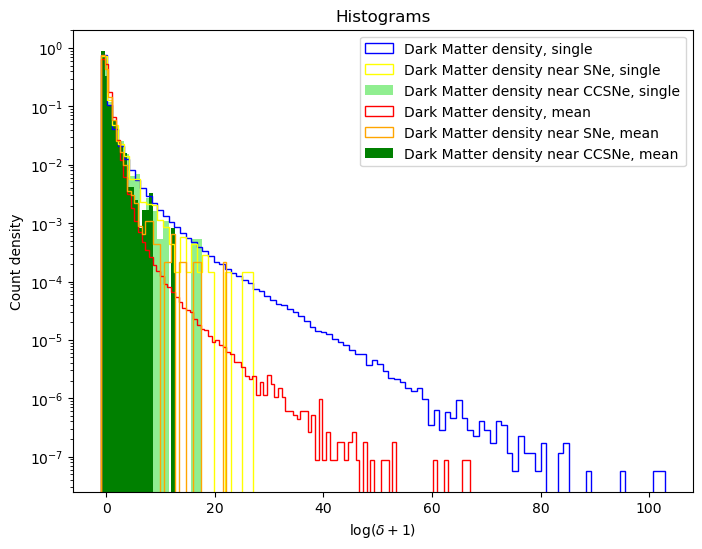

In [4]:
plt.figure(figsize=(8, 6))

c_den, b_den, _ = plt.hist(
    den_r,
    histtype="step",
    bins=100,
    log=True,
    density=True,
    color="b",
    label="Dark Matter density, single",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r, k=4)
plt.hist(
    den_SN,
    histtype="step",
    bins=b_den,
    log=True,
    density=True,
    color="yellow",
    label="Dark Matter density near SNe, single",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, den_r, k=4
)
c, b, _ = plt.hist(
    den_CCSN,
    histtype="stepfilled",
    bins=b_den,
    log=True,
    density=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe, single",
)


c_den, b_den, _ = plt.hist(
    mean_field,
    histtype="step",
    bins=100,
    log=True,
    density=True,
    color="r",
    label="Dark Matter density, mean",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, mean_field, k=4)
plt.hist(
    den_SN,
    histtype="step",
    bins=b_den,
    log=True,
    density=True,
    color="orange",
    label="Dark Matter density near SNe, mean",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, mean_field, k=4
)
c, b, _ = plt.hist(
    den_CCSN,
    histtype="stepfilled",
    bins=b_den,
    log=True,
    density=True,
    color="green",
    label="Dark Matter density near CCSNe, mean",
)


plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"$\log(\delta + 1)$")
plt.title("Histograms")
plt.savefig('../Docs/figures/Results/borg_mean_single.png')


In [54]:
def density_BORG(
    points_coord: np.ndarray,
    tree: cKDTree,
    den_r: np.ndarray,
    shift=np.array([boxsize / 2] * 3),
    k=10,
) -> np.ndarray:
    """
    Extract the density of dark matter around points using the BORG data grid.

    Parameters
    ----------
    points_coord : (n, 3) np.ndarray
        Coordinates of the points
    tree : scipy.spatial.cKDTree
        Tree of the points
    den_r : np.ndarray
        Densities at each point in the box
    k : int, default 1
        Number of nearest neighbour to consider. If > 1, it will average over the neighbours.

    Return
    ------
    density_SN : (n, 1) np.ndarray
        Density at each point
    """
    try:
        dist_id, nn_id = tree.query(points_coord + shift, k=k)
    except u.UnitConversionError:
        dist_id, nn_id = tree.query(points_coord.value + shift, k=k)

    if k == 1:
        density = den_r[nn_id]
    else:
        density = np.average(den_r[nn_id], axis=1, weights=1 / dist_id)

    return density


[]

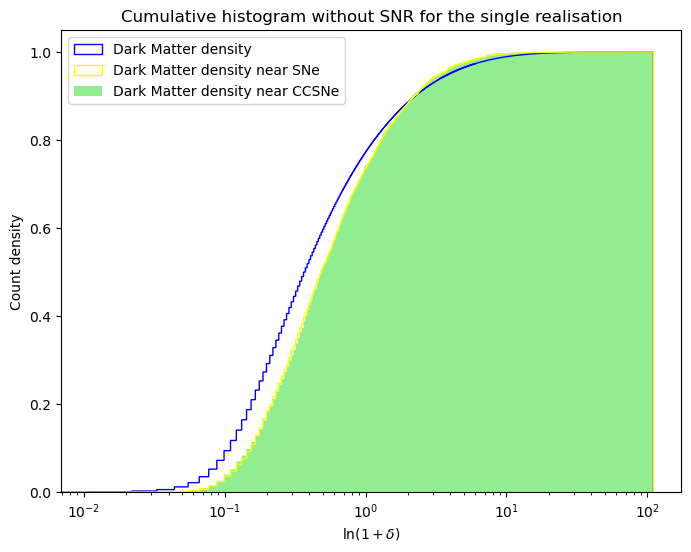

In [55]:
plt.figure(figsize=(8, 6))

cs_dm, bins, _ = plt.hist(
    den_r + 1,
    histtype="step",
    bins=np.linspace(0, 110, 10000),
    density=True,
    cumulative=True,
    color="b",
    label="Dark Matter density",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r)

cs_SN, _, _ = plt.hist(
    den_SN + 1,
    histtype="step",
    bins=bins,
    density=True,
    cumulative=True,
    color="yellow",
    label="Dark Matter density near SNe",
)

den_CCSN = density_BORG(np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, den_r)

cs_CCSN, _, _ = plt.hist(
    den_CCSN + 1,
    histtype="stepfilled",
    bins=bins,
    density=True,
    cumulative=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)


# plt.axvline(np.mean(den_r), linestyle=':', color='b', label = 'Mean Dark Matter density : {:.1e}'.format(np.mean(den_r)))
# plt.axvline(np.mean(den_CCSN), linestyle=':', color='r', label = 'Mean Dark Matter density near CCSN : {:.1e}'.format(np.mean(den_CCSN)))
plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"$\ln(1+\delta)$")
plt.title("Cumulative histogram without SNR for the single realisation")
plt.xscale("log")
plt.savefig("../Docs/figures/Results/cumulative_single.png")

plt.plot()

[]

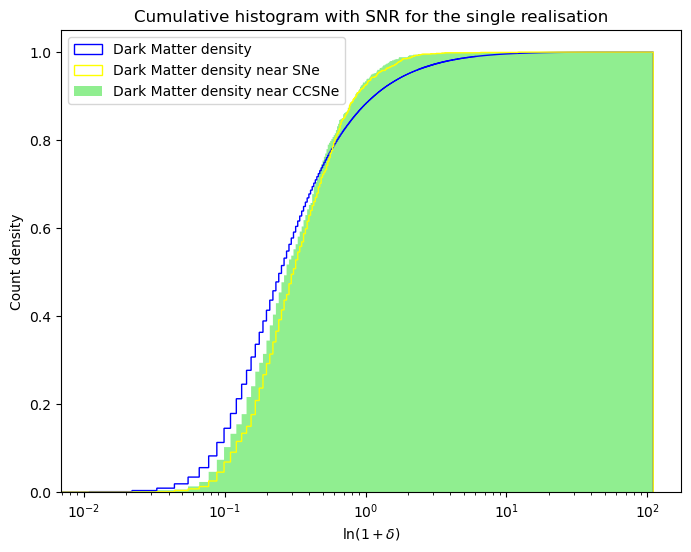

In [56]:
plt.figure(figsize=(8, 6))

snr_threshold = 10

cs_dm, bins,_ = plt.hist(
    den_r[snr_field > snr_threshold]+1,
    histtype="step",
    bins=np.linspace(0, 110, 10000),
    density=True,
    cumulative=True,
    color="b",
    label="Dark Matter density",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, den_r)
snr_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, snr_field)

cs_SN,_,_ = plt.hist(
    den_SN[snr_SN > snr_threshold]+1,
    histtype="step",
    bins=bins,
    density=True,
    cumulative=True,
    color="yellow",
    label="Dark Matter density near SNe",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, den_r, k=4
)
snr_CCSN = density_BORG(np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, snr_field)

cs_CCSN,_,_ = plt.hist(
    den_CCSN[snr_CCSN > snr_threshold]+1,
    histtype="stepfilled",
    bins=bins,
    density=True,
    cumulative=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)


# plt.axvline(np.mean(den_r), linestyle=':', color='b', label = 'Mean Dark Matter density : {:.1e}'.format(np.mean(den_r)))
# plt.axvline(np.mean(den_CCSN), linestyle=':', color='r', label = 'Mean Dark Matter density near CCSN : {:.1e}'.format(np.mean(den_CCSN)))
plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"$\ln(1+\delta)$")
plt.title('Cumulative histogram with SNR for the single realisation')
plt.xscale('log')

# plt.savefig('../Docs/figures/Results/cumulative_single_snr.png')

plt.plot()

[]

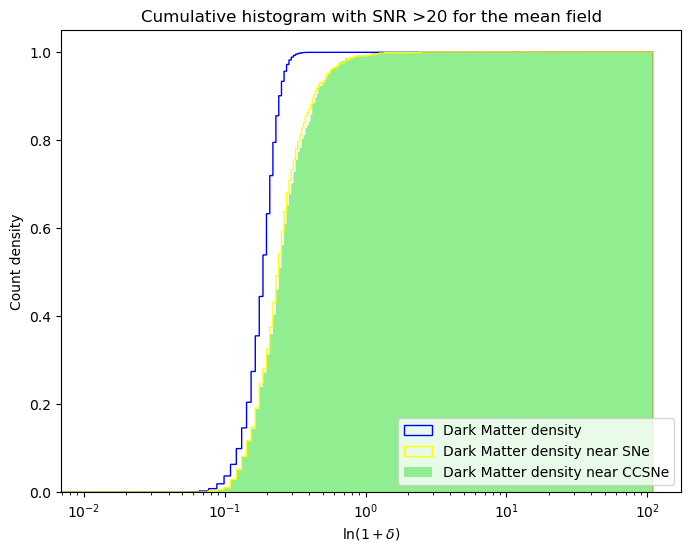

In [78]:
plt.figure(figsize=(8, 6))

snr_threshold = 20

cs_dm, bins, _ = plt.hist(
    mean_field[snr_field > snr_threshold] + 1,
    histtype="step",
    bins=np.linspace(0, 110, 10000),
    density=True,
    cumulative=True,
    color="b",
    label="Dark Matter density",
)

den_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, mean_field)
snr_SN = density_BORG(np.vstack([SN["x"], SN["y"], SN["z"]]).T, tree, snr_field)

cs_SN, _, _ = plt.hist(
    den_SN[snr_SN > snr_threshold] + 1,
    histtype="step",
    bins=bins,
    density=True,
    cumulative=True,
    color="yellow",
    label="Dark Matter density near SNe",
)

den_CCSN = density_BORG(
    np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, mean_field
)
snr_CCSN = density_BORG(np.vstack([CCSN["x"], CCSN["y"], CCSN["z"]]).T, tree, snr_field)

cs_CCSN, _, _ = plt.hist(
    den_CCSN[snr_CCSN > snr_threshold] + 1,
    histtype="stepfilled",
    bins=bins,
    density=True,
    cumulative=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)


# plt.axvline(np.mean(den_r), linestyle=':', color='b', label = 'Mean Dark Matter density : {:.1e}'.format(np.mean(den_r)))
# plt.axvline(np.mean(den_CCSN), linestyle=':', color='r', label = 'Mean Dark Matter density near CCSN : {:.1e}'.format(np.mean(den_CCSN)))
plt.legend()

plt.ylabel(r"Count density")
plt.xlabel(r"$\ln(1+\delta)$")
plt.title(f"Cumulative histogram with SNR >{snr_threshold} for the mean field")
plt.xscale("log")

# plt.savefig('../Docs/figures/Results/cumulative_mean_high_snr.png')

plt.plot()

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])

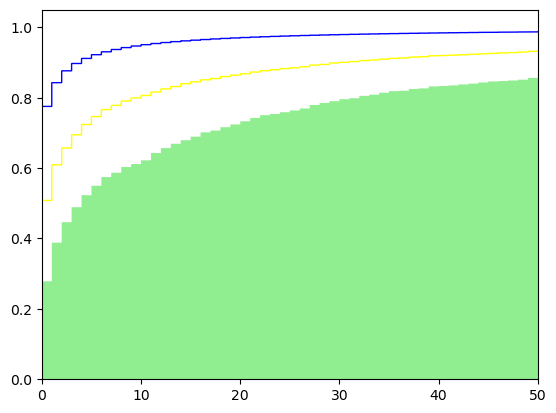

In [60]:
_, b, _ = plt.hist(
    snr_field,
    histtype="step",
    bins=np.arange(0, 10000),
    density=True,
    cumulative=True,
    color="b",
    label="Dark Matter density",
)
plt.hist(
    snr_SN,
    histtype="step",
    bins=b,
    density=True,
    cumulative=True,
    color="yellow",
    label="Dark Matter density near SNe",
)
_=plt.hist(
    snr_CCSN,
    histtype="stepfilled",
    bins=b,
    density=True,
    cumulative=True,
    color="lightgreen",
    label="Dark Matter density near CCSNe",
)
plt.xlim(0,50)
b

In [69]:
snr_threshold = 20
np.sum(snr_field > snr_threshold)/len(snr_field), np.sum(snr_SN > snr_threshold)/len(snr_SN), np.sum(snr_CCSN > snr_threshold)/len(snr_CCSN)

(0.03034573793411255, 0.13601074947745595, 0.27603583426651734)

In [79]:
t = 20
xx = (bins[1:] + bins[:-1])/2
keep = (xx < t) & (cs_dm > 0)
cs_dm = cs_dm[keep]
cs_SN = cs_SN[keep]
cs_CCSN = cs_CCSN[keep]
xx = xx[keep] - 1
xx

array([-0.98349835, -0.97249725, -0.96149615, ..., 18.97249725,
       18.98349835, 18.99449945])

Text(0.5, 1.0, 'Zoom on the low density region')

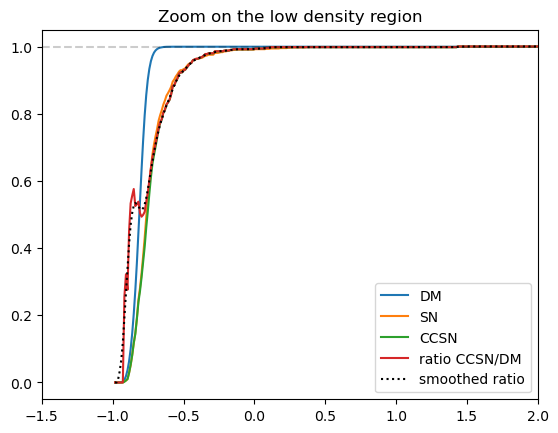

In [81]:
plt.plot(xx, (cs_dm), label="DM")
plt.plot(xx, (cs_SN), label="SN")
plt.plot(xx, (cs_CCSN), label="CCSN")

r = cs_CCSN / cs_dm
plt.plot(xx, r, label="ratio CCSN/DM")
plt.axhline(1, color="k", linestyle="--", alpha=0.2)
from scipy.signal import filtfilt

n = 5
smooth_r = filtfilt([1] * n, n, r)
plt.plot(xx, smooth_r, label="smoothed ratio", color="k", linestyle=":")

# plt.scatter(
#     np.array([-0.85, -0.56, 1.03, 8.3]),
#     np.cumsum([0.161, 0.584, 0.237, 0.018]),
#     s=3,
#     marker='*',
#     label="Eleni's DM points",
# )
# plt.scatter(
#     np.array([-0.85, -0.56, 1.03, 8.3]),
#     np.cumsum([0.04, 0.41, 0.49, 0.06]),
#     s=3,
#     label="Eleni's SN points",
# )
# plt.scatter(
#     np.array([-0.85, -0.56, 1.03, 8.3]),
#     np.cumsum([0.04, 0.44, 0.47, 0.05]),
#     s=3,
#     marker='*',
#     label="Eleni's CCSN points",
# )

# r_ = cs_SN/cs_dm
# plt.plot(xx, r_, label='ratio SN/DM')
# smooth_r_ =  filtfilt([1]*n, n, r_)
# plt.plot(xx, smooth_r_, label='smoothed ratio', color='k', linestyle=':')

plt.xlim(-1.5, 2.0)
plt.legend()
plt.title("Zoom on the low density region")

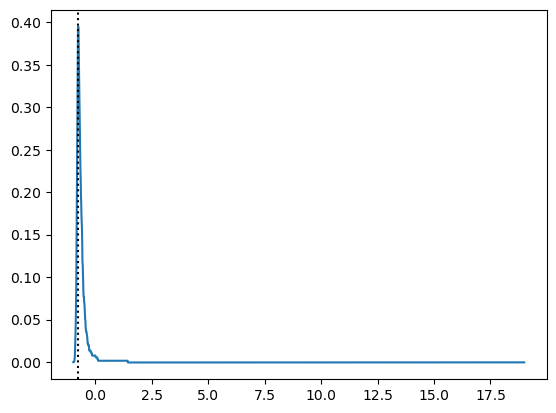

In [86]:
plt.plot(xx, cs_dm - cs_CCSN)
max_diff = xx[np.where(np.abs(cs_CCSN - cs_dm)== np.abs(cs_dm -cs_CCSN).max())[0]]
plt.axvline(max_diff, linestyle=':', color='k')

In [88]:
max_diff[0], cs_dm[xx < max_diff].max(), cs_SN[xx < max_diff].max(), cs_CCSN[xx < max_diff].max()

(-0.7634763476347635,
 0.7949194389501824,
 0.43029637760702527,
 0.4036511156186612)

In [89]:
plt.plot(xx, (cs_SN)-(cs_dm))
plt.plot(xx, (cs_SN)-(cs_CCSN))

In [90]:
from scipy.interpolate import interp1d
n = 2
light_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_light_smooth = interp1d(xx, light_smooth, kind='cubic', bounds_error=False, fill_value=0)

n = 10
medium_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_medium_smooth = interp1d(xx, medium_smooth, kind='cubic', bounds_error=False, fill_value=0)

n = 20
high_smooth =  filtfilt([1]*n, n, cs_SN/cs_dm)
test_high_smooth = interp1d(xx, high_smooth, kind='cubic', bounds_error=False, fill_value=0)


(-1.1, 0.0)

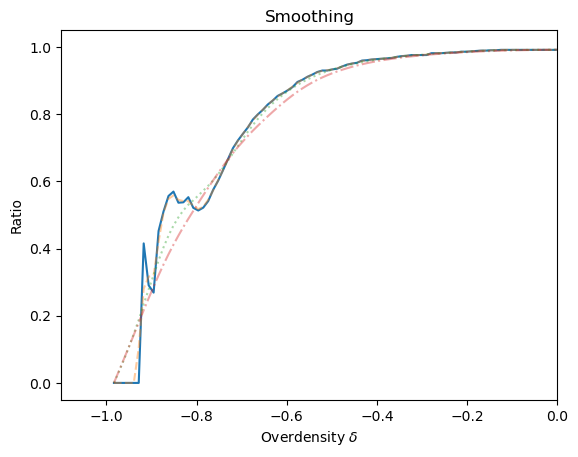

In [91]:
plt.plot(xx, cs_SN/cs_dm, label='Original ratio')
plt.plot(xx, light_smooth, alpha=0.4, linestyle='--', label='light smoothing')
plt.plot(xx, medium_smooth, alpha=0.4, linestyle=':', label='medium smoothing')
plt.plot(xx, high_smooth, alpha=0.4, linestyle='-.', label='high smoothing')
plt.ylabel("Ratio")
plt.xlabel("Overdensity $\delta$")
plt.title("Smoothing")
plt.xlim(-1.1, 0.)

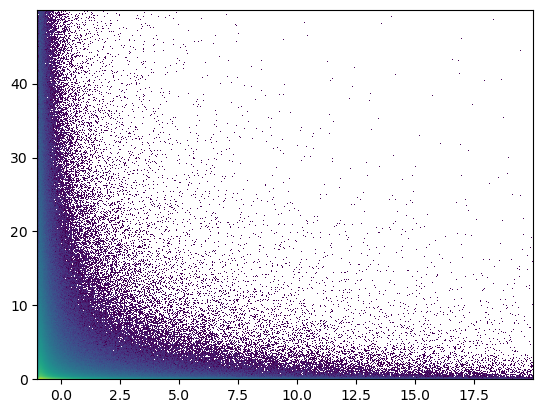

In [36]:
_=plt.hist2d(den_r[(snr_field < 50) & (den_r < 20)], snr_field[(snr_field < 50) & (den_r < 20)], bins=1000, norm='log')


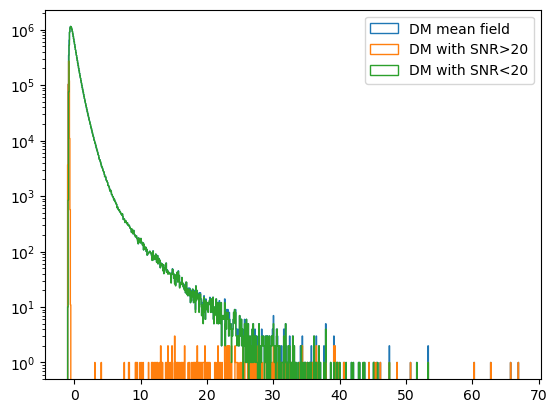

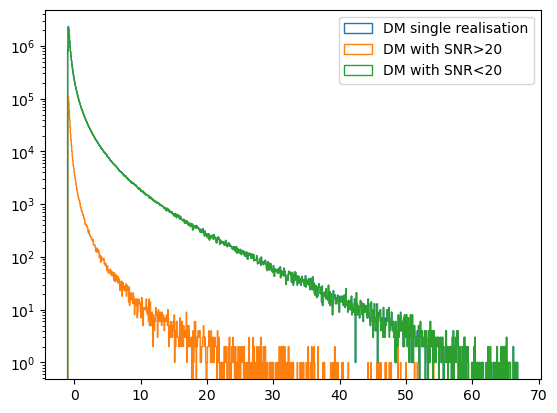

In [92]:
snr_threshold = 20

c, bins, _ = plt.hist(mean_field, log=True, bins=1000, histtype="step", label='DM mean field')
_ = plt.hist(
    mean_field[(snr_field > snr_threshold)], log=True, bins=bins, histtype="step", label=f'DM with SNR>{snr_threshold}')
_ = plt.hist(
    mean_field[(snr_field < snr_threshold)], log=True, bins=bins, histtype="step", label=f'DM with SNR<{snr_threshold}'
)
plt.legend()
plt.figure()
_ = plt.hist(den_r, log=True, bins=bins, histtype="step", label='DM single realisation')
_ = plt.hist(
    den_r[(snr_field > snr_threshold)], log=True, bins=bins, histtype="step", label=f'DM with SNR>{snr_threshold}')
_ = plt.hist(
    den_r[(snr_field < snr_threshold)], log=True, bins=bins, histtype="step", label=f'DM with SNR<{snr_threshold}'
)
plt.legend()

In [39]:
def sigmoid(x: object, alpha: float = 4.5, center: float = -0.3) -> object:
    return 1 / (1 + np.exp(-alpha * (x - center)))


In [93]:
old_prob = sigmoid(den_r)
new_field = den_r.copy()
new_field[(snr_field < snr_threshold)] = 0
new_prob = sigmoid(new_field)

_ = plt.hist(old_prob, log=True, bins=1000, density=True, histtype="step")
_ = plt.hist(new_prob, log=True, bins=1000, density=True, histtype="step")

NameError: name 'sigmoid' is not defined

In [3]:
import pickle


class SNRBORGPriorDist(BaseJointPriorDist):
    """
    Class defining prior according to given BORG grid

    Parameters
    ==========

    borg_file : file path to .fits file
        .fits file that contains the 2D or 3D Healpix Map
    bounds : dict or list (optional)
        dictionary or list with given prior bounds. defaults to normal bounds on ra, dev and 0, inf for distance
        if this is for a 3D map

    Returns
    =======

    PriorDist : `bilby.gw.prior.HealPixMapPriorDist`
        A JointPriorDist object to store the joint prior distribution according to passed healpix map
    """

    def __init__(
        self,
        borg_chain: str,
        borg_file: str,
        bounds: ArrayLike | None = None,
        cosmo: Cosmology | None = None,
        filter: object | None = None,
        snr_threshold: float | int = 1,
    ) -> None:
        self.borg_file = borg_file

        names = ["ra", "dec", "luminosity_distance"]

        if cosmo is None:
            H0, Om0 = 67.66, 0.3111
            Ode0 = 1.0 - Om0
            self.cosmo = LambdaCDM(H0, Om0, Ode0)

        self.comov_to_ld = interp1d(
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )
        self.ld_to_comov = interp1d(
            self.cosmo.luminosity_distance(np.linspace(0, 0.2, 100000)),
            self.cosmo.comoving_distance(np.linspace(0, 0.2, 100000)),
            kind="quadratic",
            copy=True,
            bounds_error=True,
        )

        [
            mcmcArray,
            num,
            N,
            NCAT,
            no_bias_params,
            bias_matrix,
            mean_field,
            std_field,
            hmc_Elh,
            hmc_Eprior,
            hades_accept_count,
            hades_attempt_count,
        ] = pickle.load(open(complete_path(borg_chain), "rb"))

        self.snr_field = mean_field.flatten()**2 / std_field.flatten()**2
        self.std_field = std_field

        self.BORG_params = dict(
            mcmc=mcmcArray,
            num=num,
            N=N,
            NCAT=NCAT,
            no_bias_params=no_bias_params,
            bias_matrix=bias_matrix,
            hmc_Elh=hmc_Elh,
            hmc_Eprior=hmc_Eprior,
            hades_accept_count=hades_accept_count,
            hades_attempt_count=hades_attempt_count,
        )

        _, self.positions, self.density, self.tree = read_dark_matter(
            complete_path(borg_file)
        )

        _tmp = self.density.copy()
        _tmp[self.snr_field < snr_threshold] = 0
        _tmp = _tmp.flatten()

        if filter:
            self.prob = filter(_tmp)
        else:
            self.prob = self._sigmoid(_tmp)

        self.prob[
            (np.linalg.norm(self.positions, ord=2, axis=1) > boxsize / 2)
            | (np.linalg.norm(self.positions, ord=2, axis=1) < 50)
        ] = 0
        self.prob = self._check_norm(self.prob)

        self.npix = len(self.prob)
        self.N = np.cbrt(self.npix)
        self.pixel_length = boxsize / self.N
        self.pixel_volume = self.pixel_length**3

        if bounds is None:
            bounds = [
                [0, 2 * np.pi],
                [-np.pi / 2.0, np.pi / 2.0],
                [
                    float(self.comov_to_ld((50 - np.sqrt(3) * self.pixel_length) / 2)),
                    float(
                        self.comov_to_ld((boxsize + np.sqrt(3) * self.pixel_length) / 2)
                    ),
                ],
            ]

        elif isinstance(bounds, dict):
            bs = [[] for _ in bounds.keys()]
            for i, key in enumerate(bounds.keys()):
                bs[i] = (bounds[key][0], bounds[key][1])
            bounds = bs

        super(SNRBORGPriorDist, self).__init__(names=names, bounds=bounds)
        self.distname = "BORG"
        self.pix_xx = np.arange(self.npix)
        self._all_interped = interp1d(
            x=self.pix_xx, y=self.prob, bounds_error=False, fill_value=0
        )
        self.inverse_cdf = None

        self._build_attributes()

    def _build_attributes(self) -> None:
        """
        Method that builds the inverse cdf of the P(pixel) distribution for rescaling
        """
        from scipy.integrate import cumtrapz

        yy = self._all_interped(self.pix_xx)
        yy /= np.trapz(yy, self.pix_xx)
        YY = cumtrapz(yy, self.pix_xx, initial=0)
        YY[-1] = 1
        self.inverse_cdf = interp1d(x=YY, y=self.pix_xx, bounds_error=True)

    def _rescale(self, samp: float | int) -> NDArray:
        """
        Overwrites the _rescale method of BaseJoint Prior to rescale a single value from the unitcube onto
        three values (ra, dec, ld)

        Parameters
        ==========
        samp : float, int
            must take in single value for pixel on unitcube to rescale onto ra, dec, distance for the map Prior

        Returns
        =======
        rescaled_sample : array_like
            sample to rescale onto the prior
        """
        samp = samp[:, 0]
        pix_rescale = self.inverse_cdf(samp)
        sample = np.empty((len(pix_rescale), 3))

        for i, val in enumerate(pix_rescale):
            sample[i, :] = self.draw_from_pixel(int(round(val)))[::-1]

        return sample.reshape((-1, self.num_vars))

    @staticmethod
    def _sigmoid(x: object, alpha: float = 4.5, center: float = -0.3) -> object:
        """
        static method to

        Parameters
        ==========
        array : float or array_like
            input

        Returns
        =======
        values : float array_like
            returns value of sigmoid at the input points
        """
        return 1 / (1 + np.exp(-alpha * (x - center)))

    @staticmethod
    def _check_norm(array: object) -> object:
        """
        static method to check if array is properlly normalized and if not to normalize it.

        Parameters
        ==========
        array : array_like
            input array we want to renormalize if not already normalized

        Returns
        =======
        normed_array : array_like
            returns input array normalized
        """
        norm = np.linalg.norm(array, ord=1)
        if norm == 0:
            norm = np.finfo(array.dtype).eps
        return array / norm

    def _sample(self, size: int) -> NDArray:
        """
        Overwrites the _sample method of BaseJoint Prior. Picks a pixel value according to their probabilities, then
        uniformly samples ra, and decs that are contained in chosen pixel. If the PriorDist includes distance it then
        updates the distance distributions and will sample according to the conditional distance distribution along a
        given line of sight

        Parameters
        ==========
        size : int
            number of samples we want to draw

        Returns
        =======
        sample : array_like
            sample of ra, and dec (and distance if 3D=True)
        """
        pixel_choices = np.arange(self.npix)
        sample_pix = np.random.choice(
            pixel_choices, size=size, p=self.prob, replace=True
        )
        sample = np.empty((size, self.num_vars))
        for samp in range(size):
            sample[samp, :] = self.draw_from_pixel(sample_pix[samp])
        return sample.reshape((-1, self.num_vars))

    def draw_from_pixel(self, pix: int) -> NDArray:
        """
        Recursive function to uniformly draw ra, and dec values that are located in the given pixel

        Parameters
        ==========
        pix : int
            pixel index for given pixel we want to get ra, and dec from

        Returns
        =======
        ra_dec_ld : ndarray
            this returns an array of ra, dec and ld sampled uniformly that are in the pixel given
        """
        x, y, z = self.positions[pix]
        draw_x = np.random.uniform(x - self.pixel_length / 2, x + self.pixel_length / 2)
        draw_y = np.random.uniform(y - self.pixel_length / 2, y + self.pixel_length / 2)
        draw_z = np.random.uniform(z - self.pixel_length / 2, z + self.pixel_length / 2)

        r = np.linalg.norm([draw_x, draw_y, draw_z], ord=2)

        draw_ra = np.arctan2(draw_y, draw_x)
        draw_dec = np.arcsin(draw_z / r)

        draw_ld = self.comov_to_ld(r)

        return np.array([draw_ra, draw_dec, draw_ld])

    def _ln_prob(
        self, samp: ArrayLike, lnprob: ArrayLike, outbounds: ArrayLike
    ) -> ArrayLike:
        """
        Overwrites the _lnprob method of BaseJoint Prior

        Parameters
        ==========
        samp : array_like
            samples of ra, dec, ld to evaluate the lnprob at
        lnprob : array_like
            array of correct length we want to populate with lnprob values
        outbounds : boolean array
            boolean array that flags samples that are out of the given bounds

        Returns
        =======
        lnprob : array_like
            lnprob values at each sample
        """
        for i in range(samp.shape[0]):
            if not outbounds[i]:
                ra, dec, ld = samp[i]
                coord = SkyCoord(
                    ra=ra * rad, dec=dec * rad, distance=self.ld_to_comov(ld)
                )
                _, pixel = self.tree.query(
                    [
                        coord.icrs.cartesian.x + boxsize / 2,
                        coord.icrs.cartesian.y + boxsize / 2,
                        coord.icrs.cartesian.z + boxsize / 2,
                    ],
                    k=1,
                )
                lnprob[i] = np.log(self.prob[pixel] / self.pixel_volume)
        lnprob[outbounds] = -np.inf
        return lnprob

    def __eq__(self, other) -> bool:
        skip_keys = ["_all_interped", "inverse_cdf"]
        if self.__class__ != other.__class__:
            return False
        if sorted(self.__dict__.keys()) != sorted(other.__dict__.keys()):
            return False
        for key in self.__dict__:
            if key in skip_keys:
                continue
            if key == "borg_file":
                if self.__dict__[key] != other.__dict__[key]:
                    return False
            elif isinstance(self.__dict__[key], (np.ndarray, list)):
                thisarr = np.asarray(self.__dict__[key])
                otherarr = np.asarray(other.__dict__[key])
                if thisarr.dtype == float and otherarr.dtype == float:
                    fin1 = np.isfinite(np.asarray(self.__dict__[key]))
                    fin2 = np.isfinite(np.asarray(other.__dict__[key]))
                    if not np.array_equal(fin1, fin2):
                        return False
                    if not np.allclose(thisarr[fin1], otherarr[fin2], atol=1e-15):
                        return False
                else:
                    if not np.array_equal(thisarr, otherarr):
                        return False
            else:
                if not self.__dict__[key] == other.__dict__[key]:
                    return False
        return True


class SNRBORGPrior(JointPrior):
    """
    A prior distribution that follows a user-provided HealPix map for one
    parameter.

    See :code:`bilby.gw.prior.HealPixMapPriorDist` for more details of how to
    instantiate the prior.
    """

    def __init__(
        self,
        dist: SNRBORGPriorDist,
        name: str = None,
        latex_label: str = None,
        unit: Unit = None,
    ) -> None:
        """

        Parameters
        ----------
        dist: bilby.gw.prior.HealPixMapPriorDist
            The base joint probability.
        name: str
            The name of the parameter, it should be contained in the map.
            One of ["ra", "dec", "luminosity_distance"].
        latex_label: str
            Latex label used for plotting, will be read from default values if
            not provided.
        unit: str
            The unit of the parameter.
        """
        if not isinstance(dist, SNRBORGPriorDist):
            raise JointPriorDistError("dist object must be instance of BORGPriorDist")
        super(SNRBORGPrior, self).__init__(
            dist=dist, name=name, latex_label=latex_label, unit=unit
        )

In [5]:
snr_priordist = SNRBORGPriorDist(
    borg_chain="data/chain_properties.p",
    borg_file="data/mcmc_10000.h5",
    snr_threshold=20,
)

In [6]:
_=plt.hist(snr_priordist.prob, bins=100, log=True)

In [7]:
snr_priordist.sample(20000)

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
ax1.hist(snr_priordist.current_sample['ra'], bins=70)
ax2.hist(snr_priordist.current_sample['dec'], bins=70)
ax3.hist(snr_priordist.current_sample['luminosity_distance'], bins=70)
plt.show()

In [9]:
label = '-108 -100 -132'

In [10]:
result = bilby.result.read_in_result(complete_path(f'{label}_result.json'))
new_priors = result.priors.copy()

In [11]:
new_priors["ra"] = SNRBORGPrior(snr_priordist, name="ra")
new_priors["dec"] = SNRBORGPrior(snr_priordist, name="dec")
new_priors["luminosity_distance"] = SNRBORGPrior(snr_priordist, name="luminosity_distance")

In [12]:
new_res = reweight(result, new_prior = new_priors, npool=8)

13:46 bilby INFO    : Reweighting posterior with 23152 samples


Computing priors:   0%|          | 0/23152 [00:00<?, ?it/s]

13:48 bilby INFO    : Rejection sampling resulted in 9916 samples


In [13]:
new_res.save_to_file(filename=f'outdir/{label}/{label}_reweighted_snr_result.pkl', extension='pkl')

In [14]:
new_restrict = read_bilby(f'{label}_reweighted_snr', dir=label)

No ecsv file detected, looking for -108 -100 -132_reweighted_snr_result.json.....
No json file detected, looking for -108 -100 -132_reweighted_snr_result.pkl......


In [15]:
restrict = read_bilby(f'{label}_reweighted', dir=label)

In [16]:
posterior = read_bilby(label)

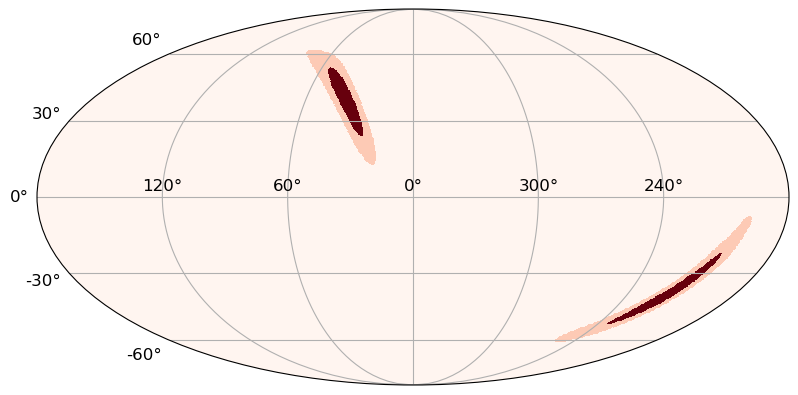

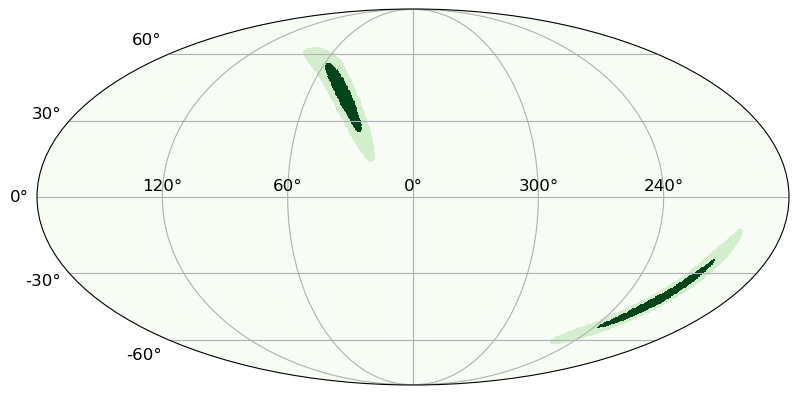

In [17]:
contourf_mollweide(posterior, quantiles=(0.5,0.9))
contourf_mollweide(restrict, quantiles=(0.5,0.9), cmap='Blues')
contourf_mollweide(new_restrict, quantiles=(0.5,0.9), cmap='Greens')


In [18]:
x,y,z = [float(a) for a in label.split(' ')]*Mpc
coord = SkyCoord(x=x, y=y, z=z, representation_type="cartesian")
ld = comov_to_ld(coord.icrs.spherical.distance) * Mpc
ra = coord.icrs.spherical.lon.to(rad)
dec = coord.icrs.spherical.lat.to(rad)

point = np.array([ra.value -2*np.pi*(ra > np.pi*rad), dec.value, ld.value])

In [19]:
fig = plot_corner_simu(posterior)
plot_corner_simu(restrict, color='r', fig=fig)
plot_corner_simu(new_restrict, color='g', fig=fig)

corner.overplot_lines(fig, point)
corner.overplot_points(fig, point[None], marker='s')

In [ ]:
new_restrict_higher_snr = read_bilby(f'{label}_reweighted_new_3', dir=label)

In [ ]:
fig = plot_corner_simu(new_restrict, color='g')
plot_corner_simu(new_restrict_higher_snr, color='y', fig=fig)

corner.overplot_lines(fig, point)
corner.overplot_points(fig, point[None], marker='s')